In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [8]:
def PolynomialRegression(degree=2, **kwargs): 
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [2]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed) 
    X = rng.rand(N, 1) ** 2 
    y=10-1./(X.ravel()+0.1) 
    if err > 0:
        y += err * rng.randn(N) 
    return X, y

In [3]:
X, y = make_data(40)
X, y

(array([[1.73907352e-01],
        [5.18867376e-01],
        [1.30815988e-08],
        [9.14049845e-02],
        [2.15372915e-02],
        [8.52641608e-03],
        [3.46928663e-02],
        [1.19412216e-01],
        [1.57424429e-01],
        [2.90323473e-01],
        [1.75724041e-01],
        [4.69525764e-01],
        [4.18007224e-02],
        [7.71090232e-01],
        [7.50080261e-04],
        [4.49526682e-01],
        [1.74143298e-01],
        [3.12134324e-01],
        [1.97084925e-02],
        [3.92442000e-02],
        [6.41191864e-01],
        [9.37530479e-01],
        [9.82347155e-02],
        [4.79310604e-01],
        [7.68057946e-01],
        [8.00321082e-01],
        [7.23251789e-03],
        [1.52527609e-03],
        [2.88423714e-02],
        [7.71134256e-01],
        [9.67209972e-03],
        [1.77331632e-01],
        [9.17552352e-01],
        [2.84265221e-01],
        [4.78693941e-01],
        [9.95501134e-02],
        [4.71283524e-01],
        [6.96600012e-01],
        [3.3

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [10]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [11]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [12]:
model = grid.best_estimator_

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

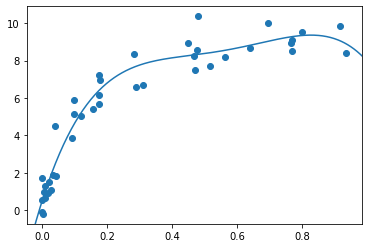

In [16]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)